# Ejercicio 1: Predicción de streams de canciones de Spotify. | Regresión Lineal

## Descripción:
Utiliza un dataset que incluye datos sobre las canciones más populares de 2023 para predecir el número total de streams acumulados en Spotify.

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Pasos:

- Limpia los datos (eliminar duplicados, valores faltantes, normalizar, transformar variables categóricas, etc.).

In [34]:
df = pd.read_csv('spotify-2023.csv', encoding = 'latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [36]:
df = df.drop(columns=['bpm', 'key', 'mode', 'in_shazam_charts']) # No nos serviran estas columnas

In [37]:
df[df['track_name'].duplicated()] # Canciones duplicadas

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
417,Die For You,Joji,1,2022,11,4,1703,0,246390068,38,45,36,16,47,15,52,38,13,29,5
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298,126,108,406,0,60,86,32,88,0,34,6
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,0,18,0,70,57,57,9,20,11,7
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,73,344,0,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,49,272,21,84,72,74,10,0,34,7
825,Flowers,Lauren Spencer Smith,1,2021,8,9,801,0,184826429,42,9,24,1,70,31,44,84,0,9,39
831,Daylight,Harry Styles,1,2022,5,20,2775,0,290833204,21,11,40,0,69,63,45,48,0,18,4
852,Numb,"Marshmello, Khalid",2,2022,6,10,3879,2,295307001,107,76,86,1,91,63,77,12,1,10,5
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,0,63,0,56,52,64,11,0,45,7
922,Miss You,Southstar,1,1982,5,16,2020,0,154356956,77,10,119,0,66,24,58,17,0,19,5


In [38]:
df = df.drop([574]) # Valor extrano
df['streams'] = pd.to_numeric(df['streams']) # Convertir a numerico
df = df.sort_values(by='streams', ascending=False) # Ordenar por streams
df = df.drop_duplicates(subset='track_name', keep='first') # Eliminar duplicados

In [39]:
df[df['track_name'].duplicated()] # Verificar duplicados

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


In [40]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,"3,421",20,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,0,"6,808",7,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,125,"1,800",0,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,167,"3,595",6,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,117,843,4,76,91,50,54,0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Overdrive,Post Malone,1,2023,7,14,410,36,14780425,36,32,31,1,56,48,73,0,0,35,4
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,5,2,30,2,93,68,65,42,0,12,25
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,7,13,437,31,11599388,17,29,26,3,79,92,89,5,0,6,5
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1365184,13,78,2,0,82,62,74,10,0,33,7


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            942 non-null    object
 1   artist(s)_name        942 non-null    object
 2   artist_count          942 non-null    int64 
 3   released_year         942 non-null    int64 
 4   released_month        942 non-null    int64 
 5   released_day          942 non-null    int64 
 6   in_spotify_playlists  942 non-null    int64 
 7   in_spotify_charts     942 non-null    int64 
 8   streams               942 non-null    int64 
 9   in_apple_playlists    942 non-null    int64 
 10  in_apple_charts       942 non-null    int64 
 11  in_deezer_playlists   942 non-null    object
 12  in_deezer_charts      942 non-null    int64 
 13  danceability_%        942 non-null    int64 
 14  valence_%             942 non-null    int64 
 15  energy_%              942 non-null    int64 

In [42]:
df.to_csv('cleaned-spotify-2023.csv', index=False) # Guardar el dataset limpio

- Analiza las variables más influyentes en los streams

In [43]:
# Seleccionar solo las columnas numéricas para analizar las correlaciones
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr() # Calcular la matriz de correlación
correlation_matrix

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.083100,0.039319,-0.017685,-0.103986,-0.022392,-0.138370,-0.052625,-0.093478,-0.002373,0.205898,0.128015,0.134649,-0.100626,-0.049126,0.045423,0.120053
released_year,0.083100,1.000000,0.079387,0.175999,-0.406396,0.065037,-0.238473,-0.207063,-0.049787,0.091917,0.180420,-0.055648,0.085198,-0.119732,-0.018682,-0.007289,0.130447
released_month,0.039319,0.079387,1.000000,0.079620,-0.104484,-0.046914,-0.022791,0.000946,-0.019138,-0.006528,-0.044477,-0.116156,-0.078820,0.048988,0.029501,-0.010584,0.039069
released_day,-0.017685,0.175999,0.079620,1.000000,-0.080079,0.021554,0.009969,0.027073,0.013344,0.077052,0.047793,0.041206,0.053365,-0.005787,0.016432,0.002100,-0.015292
in_spotify_playlists,-0.103986,-0.406396,-0.104484,-0.080079,1.000000,0.162983,0.789909,0.708782,0.270422,0.143929,-0.108167,-0.023860,0.032759,-0.064907,-0.026612,-0.046879,-0.089897
in_spotify_charts,-0.022392,0.065037,-0.046914,0.021554,0.162983,1.000000,0.244709,0.233920,0.551601,0.607577,0.029412,0.035518,0.079881,-0.054714,-0.008903,-0.046066,-0.083794
streams,-0.138370,-0.238473,-0.022791,0.009969,0.789909,0.244709,1.000000,0.773987,0.320531,0.229504,-0.106086,-0.043365,-0.027956,-0.003319,-0.043930,-0.049771,-0.112798
in_apple_playlists,-0.052625,-0.207063,0.000946,0.027073,0.708782,0.233920,0.773987,1.000000,0.414977,0.366400,-0.029701,0.055187,0.051092,-0.062244,-0.055393,-0.050645,-0.108882
in_apple_charts,-0.093478,-0.049787,-0.019138,0.013344,0.270422,0.551601,0.320531,0.414977,1.000000,0.386231,-0.029489,0.049023,0.099684,-0.074092,-0.011624,-0.017833,-0.152970
in_deezer_charts,-0.002373,0.091917,-0.006528,0.077052,0.143929,0.607577,0.229504,0.366400,0.386231,1.000000,0.070585,0.078223,0.094111,-0.028332,0.003301,-0.012696,-0.080513


In [44]:
correlation_streams = correlation_matrix['streams'].sort_values(ascending=False)
correlation_streams # Ordenar las correlaciones con el numero de streams

streams                 1.000000
in_spotify_playlists    0.789909
in_apple_playlists      0.773987
in_apple_charts         0.320531
in_spotify_charts       0.244709
in_deezer_charts        0.229504
released_day            0.009969
acousticness_%         -0.003319
released_month         -0.022791
energy_%               -0.027956
valence_%              -0.043365
instrumentalness_%     -0.043930
liveness_%             -0.049771
danceability_%         -0.106086
speechiness_%          -0.112798
artist_count           -0.138370
released_year          -0.238473
Name: streams, dtype: float64

- Entrena un modelo de regresión lineal para predecir los streams de las canciones.

In [45]:
features = ['in_spotify_playlists', 'in_apple_playlists', 'in_apple_charts', 'in_spotify_charts', 'in_deezer_charts'] # Variables independientes con mayor correlación
X = df[features]  # Variables independientes
y = df['streams']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

Ridge()

- Evalúa el modelo con metricas como RMSE

In [49]:
y_pred = ridge_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) con Ridge: {rmse:.2f}')

Root Mean Squared Error (RMSE) con Ridge: 293699657.68


In [50]:
# Mostrar los coeficientes del modelo
coefficients = pd.DataFrame(ridge_model.coef_, features, columns=['Coefficient'])
print("\nCoeficientes del modelo:\n", coefficients)


Coeficientes del modelo:
                        Coefficient
in_spotify_playlists  2.702182e+08
in_apple_playlists    2.726532e+08
in_apple_charts      -2.881355e+07
in_spotify_charts     9.556499e+07
in_deezer_charts     -4.802812e+07


- Presenta los resultados con graficos y presenta tu analisis.

La matriz de correlacion nos indica como se relacionan las variables numericas con la variable objetivo: streams.

Las variables independientes con mayor correlacion con streams son:
- in_spotify_playlists
- in_apple_playlists
- in_apple_charts
- in_spotify_charts
- in_deezer_charts

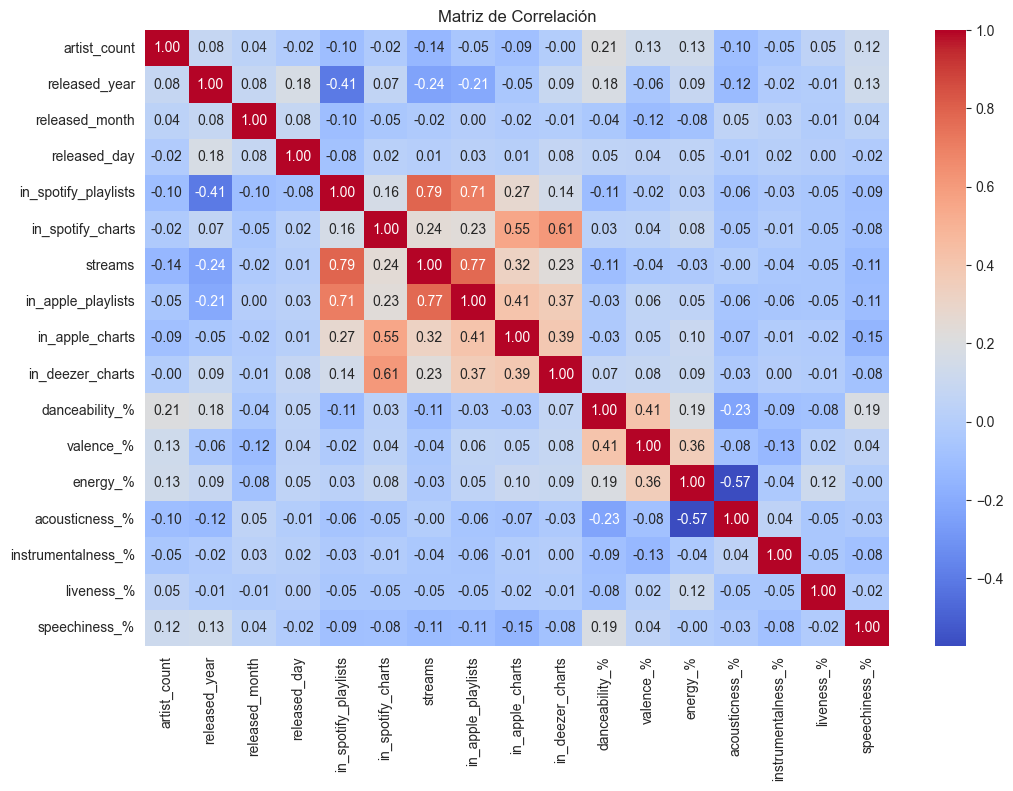

In [51]:
#matriz de correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Heatmap de la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación')
plt.show()


Se grafican las variables independientes más correlacionadas con la variable objetivo streams.

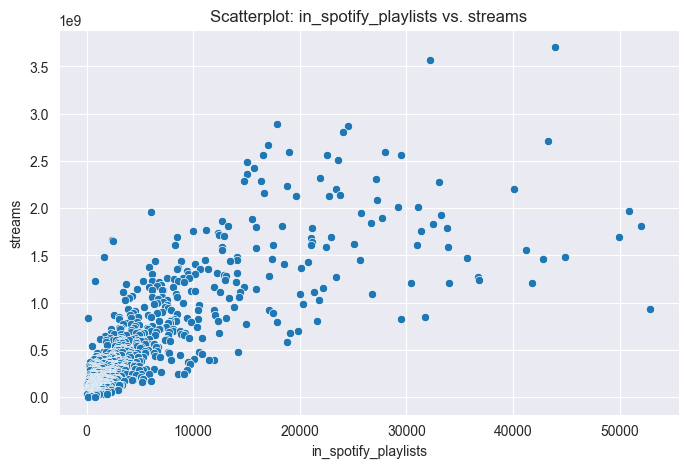

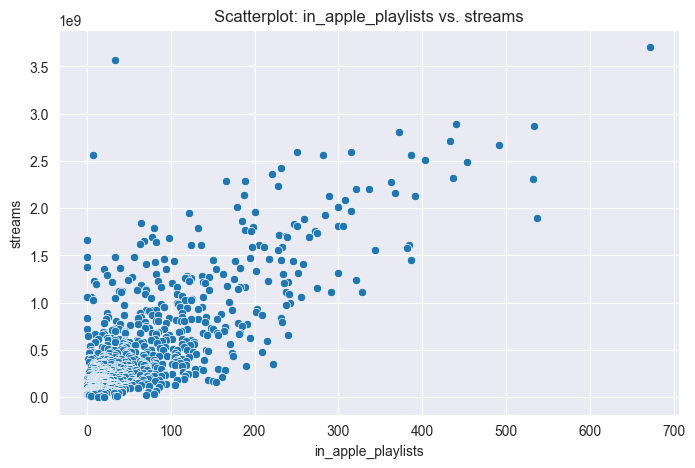

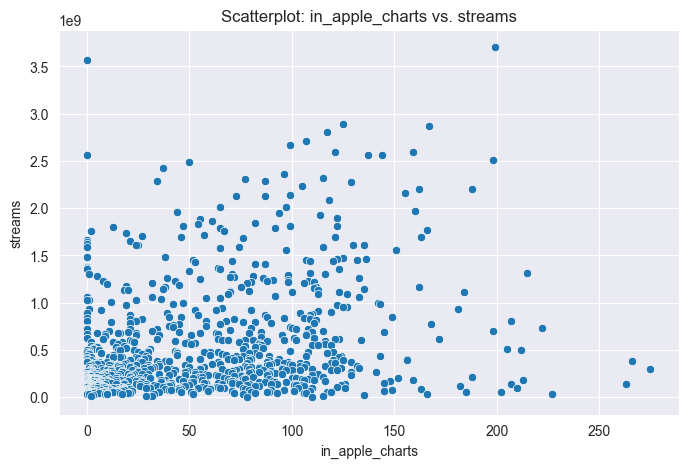

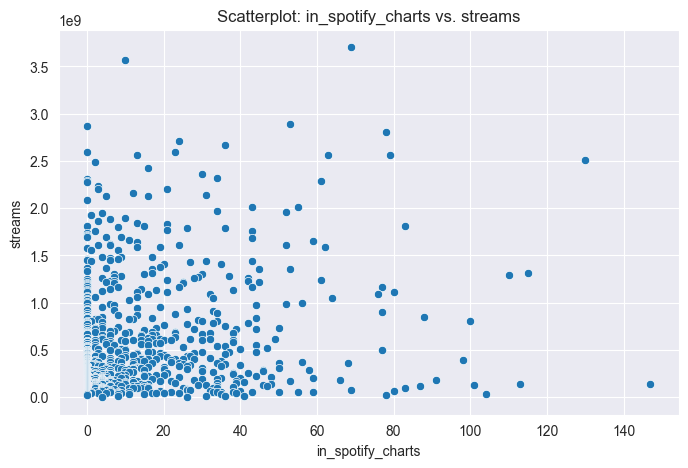

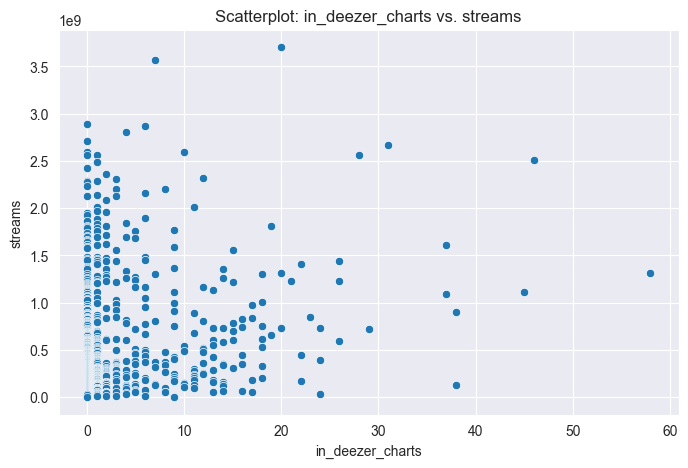

In [52]:
# variables más correlacionadas con streams
correlation_streams = correlation_matrix['streams'].sort_values(ascending=False)
top_variables = correlation_streams.index[1:6]  # Seleccionar las 5 variables más correlacionadas
for var in top_variables:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=var, y='streams')
    plt.title(f'Scatterplot: {var} vs. streams')
    plt.xlabel(var)
    plt.ylabel('streams')
    plt.show()


El modelo de regresión lineal con regularización Ridge se ajusta a las variables independientes seleccionadas y se evalúa con la métrica de error RMSE.

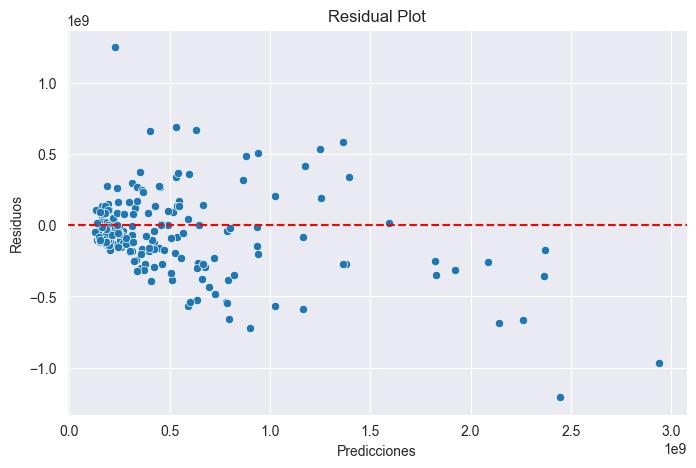

In [53]:
# Graficar los residuos
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()


Se grafica la comparación entre los valores reales y las predicciones del modelo.

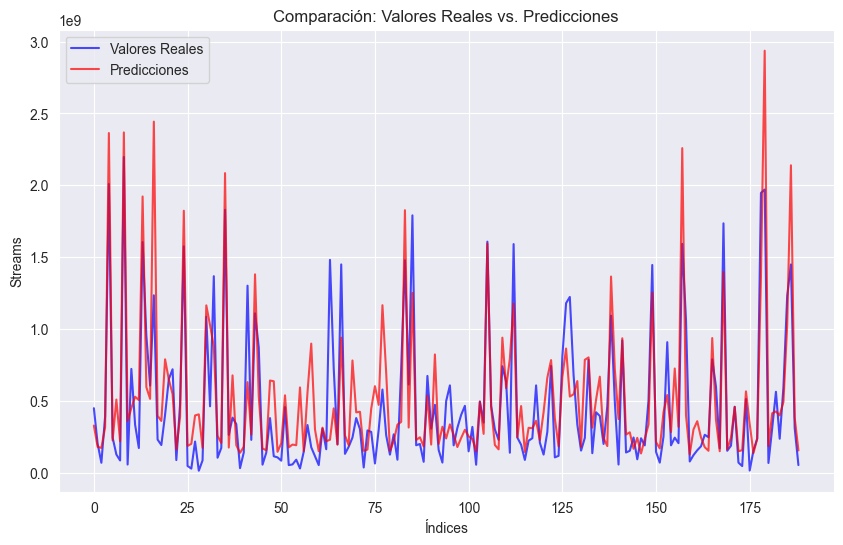

In [54]:
# Gráfico de comparación de valores reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reales', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicciones', color='red', alpha=0.7)
plt.title('Comparación: Valores Reales vs. Predicciones')
plt.xlabel('Índices')
plt.ylabel('Streams')
plt.legend()
plt.show()

Estos gráficos muestran cómo se distribuyen las variables respecto a los streams. Se observa que las variables in_spotify_playlists e in_apple_playlists tienen una relación lineal con los streams, mientras que las demás variables no presentan una relación clara.

El RMSE es alto (en cientos de millones), eso indica que el modelo tiene una alta variabilidad en sus predicciones y necesita mejoras. Se puede intentar con otros modelos de regresión o anadir caracteristicas al modelo actual.

En el gráfico de residuos se observa que los residuos no siguen un patrón claro, lo cual es positivo. Sin embargo, se observa que hay residuos muy altos en algunas predicciones, lo que puede estar afectando el RMSE.

En el gráfico de comparación de valores reales vs. predicciones se observa que el modelo no se ajusta bien a los valores reales, ya que las predicciones no siguen la misma tendencia que los valores reales.